              Usage
count  13050.000000
mean      59.988582
std        7.752075
min       28.000000
25%       55.000000
50%       60.000000
75%       65.000000
max       90.000000


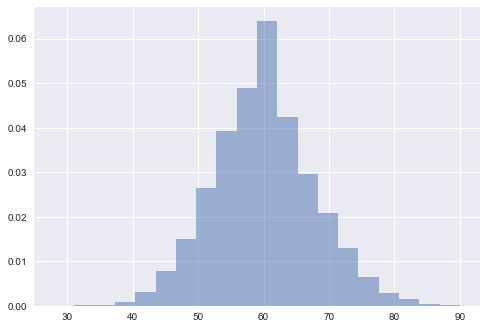

            date   time  Usage
index                         
0     2017-09-27  12:58     65
1     2017-09-27  12:48     53
2     2017-09-27  12:38     61
3     2017-09-27  12:28     56
4     2017-09-27  12:18     55
5     2017-09-27  12:08     58
6     2017-09-27  11:58     62
7     2017-09-27  11:48     54
8     2017-09-27  11:38     60
9     2017-09-27  11:28     61
10    2017-09-27  11:18     57
11    2017-09-27  11:08     62
12    2017-09-27  10:58     68
13    2017-09-27  10:48     51
14    2017-09-27  10:38     49
15    2017-09-27  10:28     56
16    2017-09-27  10:18     68
17    2017-09-27  10:08     59
18    2017-09-27  09:58     58
19    2017-09-27  09:48     50


In [90]:
# This part involves parsing of csv and have a easy visualization of the same

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#df = pd.read_csv("data.csv", dtype={'Date':np., 'time':np.string_, 'usage':np.float64})
df= pd.read_csv('data.csv', sep=',', parse_dates=[0], header=None,
                         names=['index','date', 'time', 'usage'])
#dff = pd.DataFrame("data.csv",columns = ['date','time','usage'])
df.rename(columns = {'usage':'Usage'}, inplace=True)
# Set index
df = df.set_index('index')

#converting string variable to datetime
df['date']=pd.to_datetime(df['date'], format="%d/%m/%Y")
#df['time']=pd.to_datetime(df['time'],format="%H:%M").dt.time
# descriptions
print(df.describe())

plt.hist(df['Usage'], alpha=0.5, bins=20, normed=True);
plt.show();

#print the first 20 rows
print df.head(20)

In [91]:
#converting the datetime to more sub parts
df['date']=pd.to_datetime(df['date'])
df['time']=pd.to_datetime(df['time'])
column_1 = df['date']
column_2 = df['time']

df = pd.DataFrame({"Year": column_1.dt.year,
              "Month": column_1.dt.month,
              "Day": column_1.dt.day,
              "Hour": column_2.dt.hour,
              "Minute": column_2.dt.minute,
              "Usage": df['Usage']
             })
df = df[['Year','Month','Day','Hour','Minute','Usage']]



In [92]:
print df
# Splitting Data set into 2 part... one train data set and other validation data set

       Year  Month  Day  Hour  Minute  Usage
index                                       
0      2017      9   27    12      58     65
1      2017      9   27    12      48     53
2      2017      9   27    12      38     61
3      2017      9   27    12      28     56
4      2017      9   27    12      18     55
5      2017      9   27    12       8     58
6      2017      9   27    11      58     62
7      2017      9   27    11      48     54
8      2017      9   27    11      38     60
9      2017      9   27    11      28     61
10     2017      9   27    11      18     57
11     2017      9   27    11       8     62
12     2017      9   27    10      58     68
13     2017      9   27    10      48     51
14     2017      9   27    10      38     49
15     2017      9   27    10      28     56
16     2017      9   27    10      18     68
17     2017      9   27    10       8     59
18     2017      9   27     9      58     58
19     2017      9   27     9      48     50
20     201

In [93]:
# Split-out validation dataset
array = df.values
year = array[:,0]
month = array[:,1]
day = array[:,2]
hour = array[:,3]
minute =array[:,4]
usage =array[:,5]
validation_size = 0.20
seed = 7
year_train, year_validation, month_train, month_validation, day_train, day_Validation, hour_train, hour_Validation, minute_train, minute_Validation, usage_train, usage_Validation = model_selection.train_test_split(year,month,day,hour,minute,usage,test_size=validation_size,random_state=seed)







In [135]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [136]:
print X_train,Y_train

[[2017    8   21   17]
 [2017    8   14    1]
 [2017    8   28    8]
 ..., 
 [2017    9   23   19]
 [2017    7   24   14]
 [2017    7    3   13]] [64 52 39 ..., 53 60 67]


In [137]:
print type(year_train[0]),type(month_train[0]),type(day_train[0]),type(hour_train[0]),type(minute_train[0]),type(usage_train[0])

<type 'numpy.int64'> <type 'numpy.int64'> <type 'numpy.int64'> <type 'numpy.int64'> <type 'numpy.int64'> <type 'numpy.int64'>


In [138]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [139]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model,X_train,Y_train , cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.049617 (0.004406)
LDA: 0.050000 (0.007153)
KNN: 0.034195 (0.006134)
CART: 0.035632 (0.003228)
NB: 0.031130 (0.004069)
SVM: 0.047414 (0.007107)
